Test for pupil labs device: Precision in horizontal and vertical scans.

Test description:
   1)  Register horizontal scan and a vertical scan.
   2)  Analysis of gaze positions
   3) Check if pupul diameter is normal.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
#Read the data

vertical_data=r'../vision_ejes/data/gaze_positions_verticales.csv'
horizontal_data=r'../vision_ejes/data/gaze_positions - copia.csv'

vertical_test=pd.read_csv(vertical_data,delimiter=';',decimal=',')
horizontal_test=pd.read_csv(horizontal_data,delimiter=';',decimal=',')

print(vertical_test.head())


   gaze_normal0_x  gaze_normal0_y  gaze_normal0_z  gaze_normal1_x  \
0       -0.291397       -0.197346        0.936025       -0.046995   
1       -0.291397       -0.197346        0.936025       -0.048606   
2       -0.293524       -0.195760        0.935693       -0.048606   
3       -0.293524       -0.195760        0.935693       -0.048893   
4       -0.297294       -0.196198        0.934410       -0.048893   

   gaze_normal1_y  gaze_normal1_z  norm_pos_x  norm_pos_y  
0       -0.188338        0.980979    0.345991    0.607877  
1       -0.186875        0.981181    0.345762    0.607337  
2       -0.186875        0.981181    0.344571    0.605808  
3       -0.189195        0.980721    0.344516    0.607300  
4       -0.189195        0.980721    0.342382    0.606601  


Now lets plot the exploration for the vertical test.
The first thing we do is to interactively plot the scan path and filter out the outliers.

KeyboardInterrupt: 

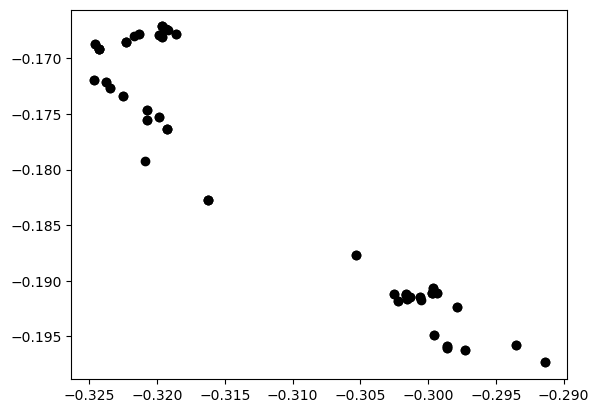

In [106]:
import time
import pylab as pl
from IPython import display
for timestamp,_ in enumerate(vertical_test['gaze_normal0_x']):
    plt.plot(vertical_test['gaze_normal0_x'][timestamp],vertical_test['gaze_normal0_y'][timestamp],'o',color='black')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    # time.sleep(0.0005)

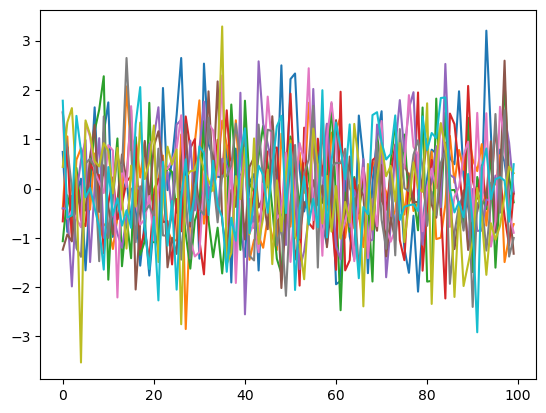

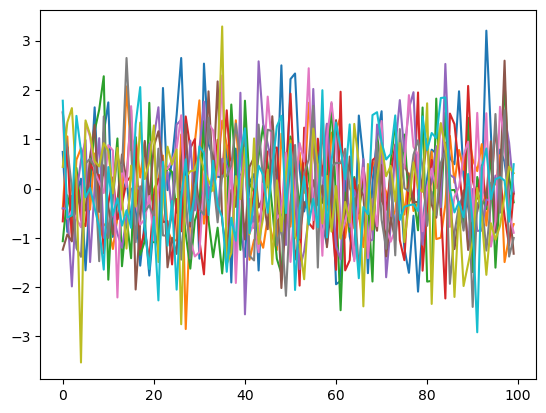

In [95]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

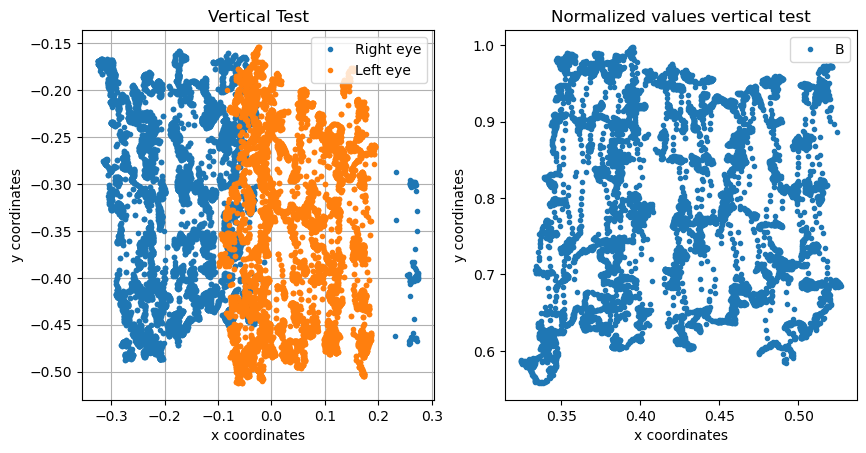

In [78]:
# sns.set_theme(style='darkgrid')
fig,ax=plt.subplots(1,2)
ax[0].plot(vertical_test['gaze_normal0_x'],vertical_test['gaze_normal0_y'],'.')
ax[0].plot(vertical_test['gaze_normal1_x'],vertical_test['gaze_normal1_y'],'.')
ax[1].plot(vertical_test['norm_pos_x'],vertical_test['norm_pos_y'],'.')
ax[0].legend(['Right eye','Left eye'])
ax[0].set_title('Vertical Test')
ax[1].set_title('Normalized values vertical test')
ax[1].legend('Both eyes')
ax[0].grid()
ax[0].set_xlabel('x coordinates')
ax[0].set_ylabel('y coordinates')
ax[1].set_xlabel('x coordinates')
ax[1].set_ylabel('y coordinates')

fig.set_figwidth(10)


Lets see the correlation of exploration movements for the vertical test

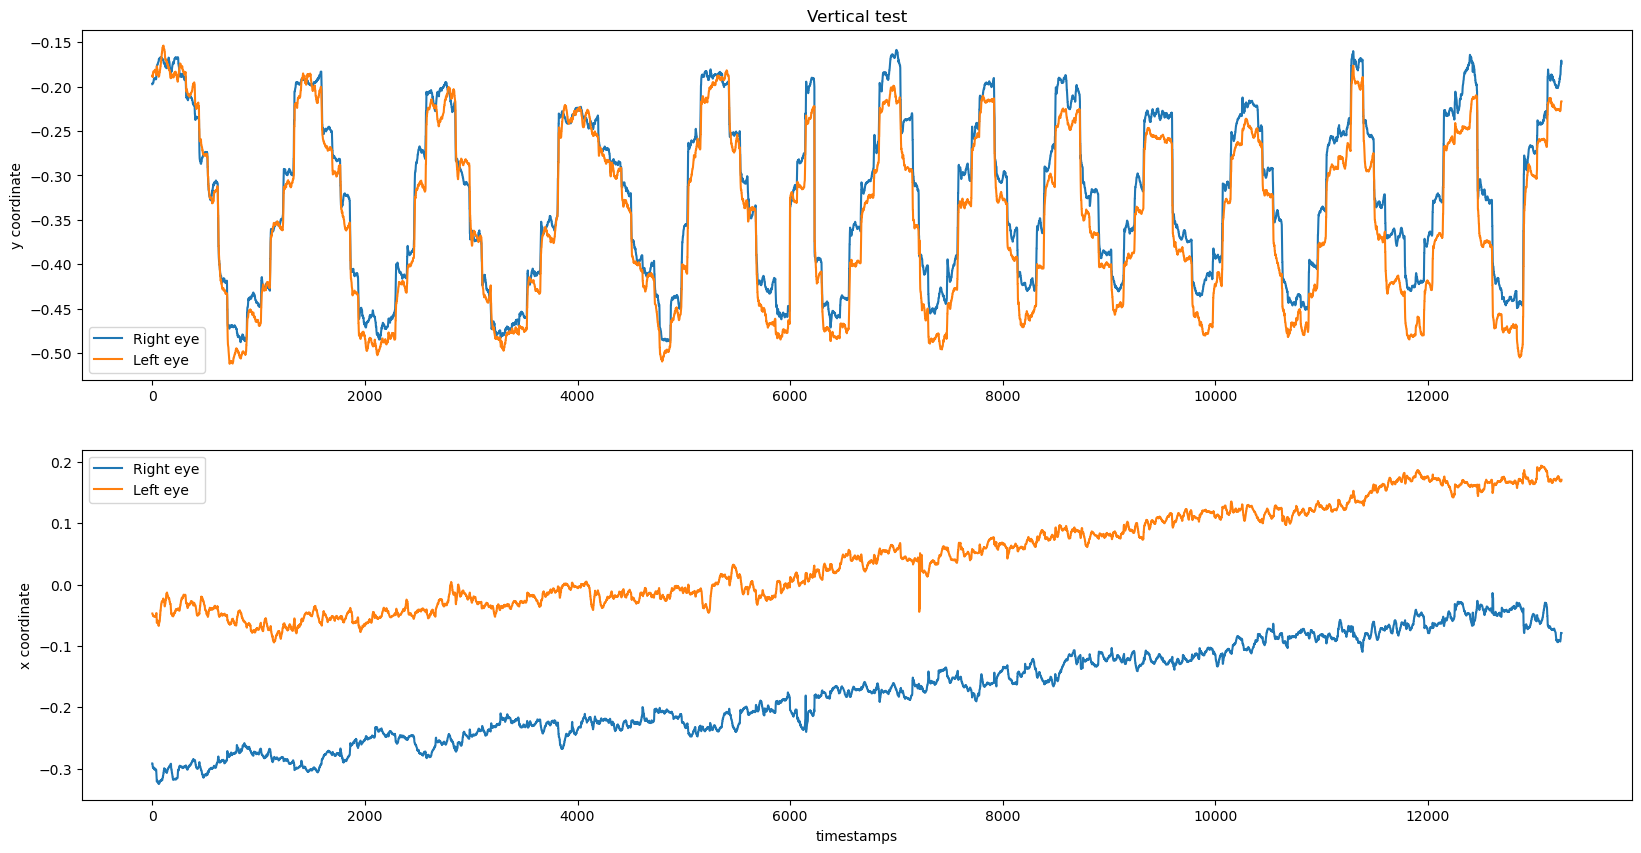

In [83]:
vert_test_filtered=vertical_test[vertical_test['gaze_normal0_x']<0]
timestamps=np.array(range(len(vert_test_filtered['gaze_normal0_y'])))

fig3,ax3=plt.subplots(2)
ax3[0].plot(timestamps,vert_test_filtered['gaze_normal0_y'],'-')
ax3[0].plot(timestamps,vert_test_filtered['gaze_normal1_y'],'-')
ax3[1].plot(timestamps,vert_test_filtered['gaze_normal0_x'],'-')
ax3[1].plot(timestamps,vert_test_filtered['gaze_normal1_x'],'-')
ax3[0].set_title('Vertical test')
ax3[0].set_ylabel('y coordinate')
ax3[1].set_ylabel('x coordinate')
ax3[1].legend(['Right eye','Left eye'])
ax3[0].legend(['Right eye','Left eye'])
ax3[1].set_xlabel('timestamps')


fig3.set_figwidth(20)
fig3.set_figheight(10)


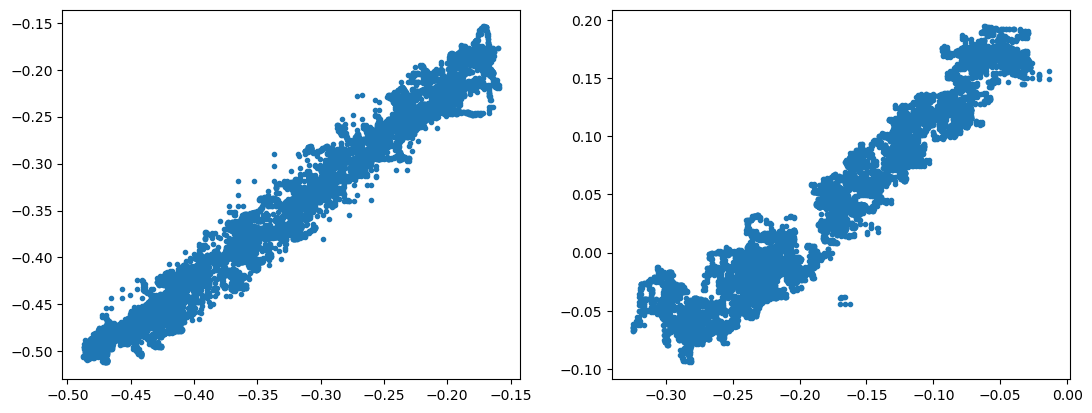

In [84]:

fig2,ax2=plt.subplots(1,2)
ax2[0].plot(vert_test_filtered['gaze_normal0_y'],vert_test_filtered['gaze_normal1_y'],'.')
ax2[1].plot(vert_test_filtered['gaze_normal0_x'],vert_test_filtered['gaze_normal1_x'],'.')
ax2[]

fig2.set_figwidth(13)


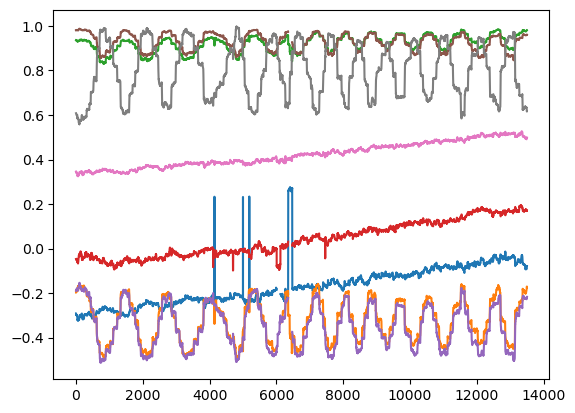

In [52]:
plt.plot(vertical_test)